# Working with images in Python

As we seen briefly before, NumPy array can be used to represent image data, and therefore you can perform potentially arbitrarily complex image manipulation by manipulating NumPy arrays. 

Here we are going to take a deeper look at how image data is represented and handled in Python, and take a look at various basic image manipulation/processing operations that can be carried on. Let's get started! 

As always, the very first step should be importing of the essential packages: 

In [1]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

## Arbitrary 2D array as "grayscale" image

Creating an "image" can be as simple as preparing any 2D NumPy array. For example:

In [2]:
flat_image = np.ones((32, 32)) # creates 32x32 "image" filled with ones

can already be interpreted as an image. We plot the image content with `plt.imshow` function:

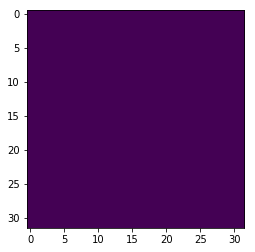

In [3]:
plt.imshow(flat_image)

When looking at an image, we would often want to remove the axis using `plt.axis('off')`

(-0.5, 31.5, 31.5, -0.5)

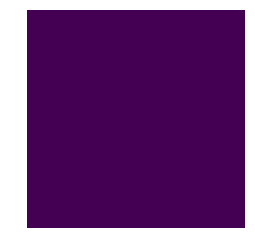

In [4]:
plt.imshow(flat_image)
plt.axis('off')

This resulted in some flat image (we'll get to the question of the color very shortly).

Im order for an array to be interpreted as an image, it must be at least 2D in dimensions:

TypeError: Invalid dimensions for image data

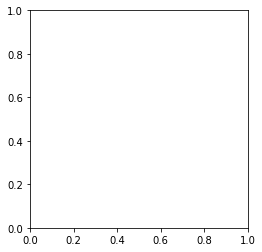

In [5]:
gradation = np.linspace(0, 1, 5)

# wouldn't work because it is just a 1D array
plt.imshow(gradation)

plt.axis('off')

You can overcome this by giving the array an additional dimension with the `np.newaxis` trick:

(-0.5, 4.5, 0.5, -0.5)

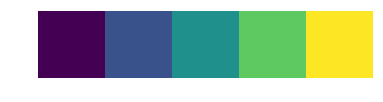

In [6]:
x = gradation[np.newaxis, :] # make 1 x 32 copy
plt.imshow(x)
x
plt.axis('off')

(-0.5, 0.5, 4.5, -0.5)

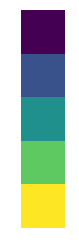

In [7]:
y = gradation[:, np.newaxis] # make 32 x 1 copy
plt.imshow(y)
plt.axis('off')

A bit more interesting image can be used by doing a bit of broadcasting trick:

array([[0.    , 0.    , 0.    , 0.    , 0.    ],
       [0.    , 0.0625, 0.125 , 0.1875, 0.25  ],
       [0.    , 0.125 , 0.25  , 0.375 , 0.5   ],
       [0.    , 0.1875, 0.375 , 0.5625, 0.75  ],
       [0.    , 0.25  , 0.5   , 0.75  , 1.    ]])

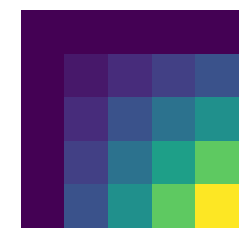

In [8]:
image = x * y

plt.imshow(image)
plt.axis('off')

image

# Images to represent 2D function

Just like a 1D array can be thought of representing a sequence of values read out from a function:

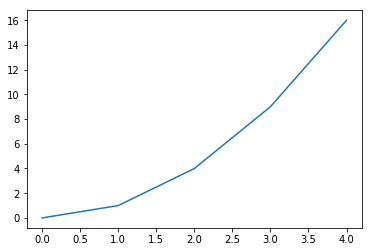

In [9]:
x = np.arange(5)
f = x**2

plt.plot(f) # let matplotlib assume index as x-axis

You can actually think of a 2D array to be representing readouts of a **2D function**. In the earlier example of the gradation image, the image could be thought of as representing a function:

$z = x * y$

such that the value of the $i^\text{th}$ row and $j^\text{th}$ column corresponds to the value of the function at $i^\text{th}$ entry of the y-value and $j^\text{th}$ entry of the x-value.

To make things, concrete, let's take a look at another function:

$z = (x + y) / 2$

In [10]:
x = np.linspace(0, 1, 5)
x

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

In [11]:
y = np.linspace(0, 1, 5)[:, np.newaxis]
y

array([[0.  ],
       [0.25],
       [0.5 ],
       [0.75],
       [1.  ]])

In [12]:
z = (x + y) / 2
z

array([[0.   , 0.125, 0.25 , 0.375, 0.5  ],
       [0.125, 0.25 , 0.375, 0.5  , 0.625],
       [0.25 , 0.375, 0.5  , 0.625, 0.75 ],
       [0.375, 0.5  , 0.625, 0.75 , 0.875],
       [0.5  , 0.625, 0.75 , 0.875, 1.   ]])

(-0.5, 4.5, 4.5, -0.5)

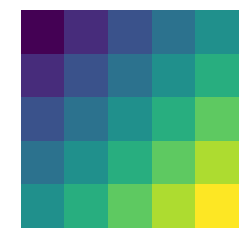

In [13]:
plt.imshow(z)
plt.axis('off')

You can compute arbitrary complex functions as you like. You can quickly get the appropriate x row vector and y column vector by using `np.ix_` function:

(-0.5, 10.5, 10.5, -0.5)

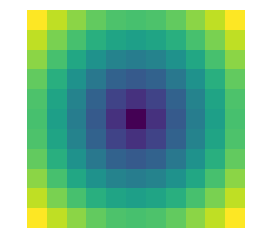

In [14]:
h, w = 11, 11
cy, cx = h // 2, w // 2
yv, xv = np.ix_(np.arange(h), np.arange(w))
# z is the distance away from the center
z = np.sqrt((yv - cy)**2 + (xv - cx)**2)


plt.imshow(z)
plt.axis('off')

### On the tangent: Plotting with interpolation

When you think of a 2D array as representing your image, every grid location is essentially a **sample** from your 2D function. By default, the function will be plotted showing a **colored patch** centered at the sample, with the color corresponding to the function value.

(-0.5, 4.5, 4.5, -0.5)

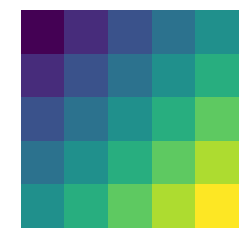

In [15]:
N = 5
x = np.linspace(0, 1, N)
y = np.linspace(0, 1, N)[:, np.newaxis]
z = (x + y) / 2
plt.imshow(z)
plt.axis('off')

You can achieve a **finer 2D function representation** by using more samples for both x and y axis:

(-0.5, 99.5, 99.5, -0.5)

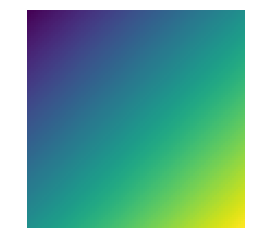

In [18]:
N = 100
x = np.linspace(0, 1, N)
y = np.linspace(0, 1, N)[:, np.newaxis]
z = (x + y) / 2
plt.imshow(z)
plt.axis('off')

Alternatively, you can **estimate** finer mapping by **interpolating** between adjacent samples. To do so, pass in `interpolation` keyword argument.

(-0.5, 4.5, 4.5, -0.5)

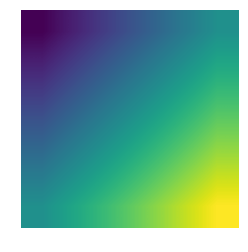

In [19]:
N = 5
x = np.linspace(0, 1, N)
y = np.linspace(0, 1, N)[:, np.newaxis]
z = (x + y) / 2
plt.imshow(z, interpolation='bilinear')
plt.axis('off')

For a more complex functions, the difference between actual finer grid of samples and an interpolated image becomes more apparent:

(-0.5, 9.5, 9.5, -0.5)

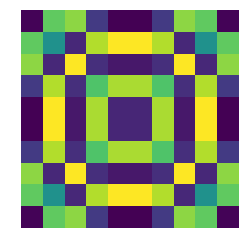

In [20]:
N = 10 # number of samples
x = np.linspace(0, 1, N)
y = np.linspace(0, 1, N)[:, np.newaxis]
z = np.cos(np.sqrt((x-0.5)**2 + (y-0.5)**2) * 10 * np.pi)
plt.imshow(z)
plt.axis('off')

(-0.5, 9.5, 9.5, -0.5)

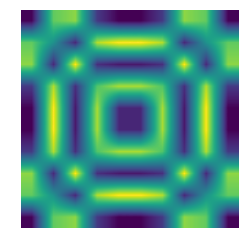

In [21]:
N = 10 # number of samples
x = np.linspace(0, 1, N)
y = np.linspace(0, 1, N)[:, np.newaxis]
z = np.cos(np.sqrt((x-0.5)**2 + (y-0.5)**2) * 10 * np.pi)
plt.imshow(z, interpolation='bilinear')
plt.axis('off')

(-0.5, 99.5, 99.5, -0.5)

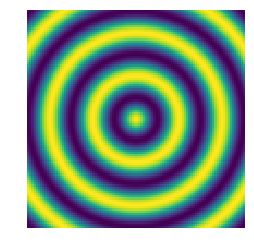

In [22]:
N = 100 # number of samples
x = np.linspace(0, 1, N)
y = np.linspace(0, 1, N)[:, np.newaxis]
z = np.cos(np.sqrt((x-0.5)**2 + (y-0.5)**2) * 10 * np.pi)
plt.imshow(z)
plt.axis('off')

With some interesting values in the image, it's time to talk about what exactly the color means in our image plot.

## Colormap for a Grayscale Image

When working with a 2D image, each pixel location (row, col location in the 2D array) contains a single value. Such image is typically referred to as a **grayscale**. When plotting a grayscale image, Matplotlib makes use of a **colormap** to decide exactly what color will be used to represent a particular value in your 2D array.

You can get the the mapping displayed by adding a **color bar** to your figure.

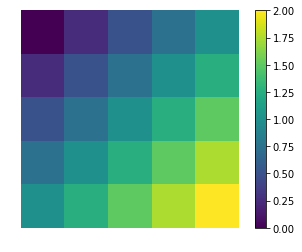

In [16]:
image = x + y

plt.imshow(image)
plt.axis('off')
# add a colorbar to show the mapping
plt.colorbar()

By default Matplotlib choses some colormap, here mapping values from 0 (smallest value found in the image) to 1 (largest value in the image) into a gradation of colors from blue to yellow, respectively. You can specificy what colormap should be used by passing in `cmap` keywrod argument to `imshow`.

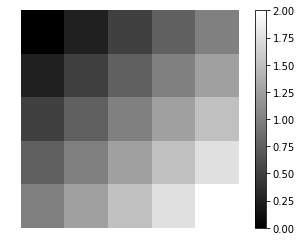

In [17]:
image = x + y

# use cmap argument to change the color map used
plt.imshow(image, cmap='gray')
plt.axis('off')

# add a colorbar to show the mapping
plt.colorbar()

Using "gray" colormap maps different shades of gray to the values of your image, thereby giving rise to the name "grayscale" image.

Aside from specifying some colormap with shorthand names like "gray" or "cool"...

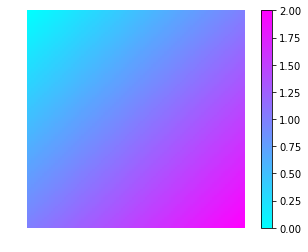

In [23]:
image = x + y

# use "cool" cmap
plt.imshow(image, cmap='cool')
plt.axis('off')

# add a colorbar to show the mapping
plt.colorbar()

You can find listing of colormaps under `plt.cm`

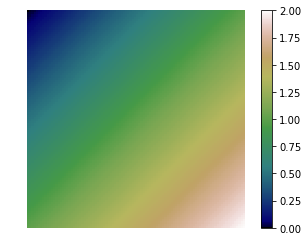

In [24]:
image = x + y

# use colormap plt.cm.gist_earth
plt.imshow(image, cmap=plt.cm.gist_earth)
plt.axis('off')

# add a colorbar to show the mapping
plt.colorbar()

And of course, you can find a good listing of all colormaps provided out-of-box in Matplotlib by [checking out their documentation](https://matplotlib.org/tutorials/colors/colormaps.html).

## Automatic scaling of colormap

Noticed that the colormap was mapped to values between 0 and 1. What happens if our image contains values outside of this range? For instance, let's adjust how we compute the image:

In [26]:
x = np.linspace(-1, 1, 5)
y = np.linspace(-1, 1, 5)[:, np.newaxis]

z = x + y

z

array([[-2. , -1.5, -1. , -0.5,  0. ],
       [-1.5, -1. , -0.5,  0. ,  0.5],
       [-1. , -0.5,  0. ,  0.5,  1. ],
       [-0.5,  0. ,  0.5,  1. ,  1.5],
       [ 0. ,  0.5,  1. ,  1.5,  2. ]])

Now that our image ranges in values from -2 to 2, let's see what happens if we plot the image:

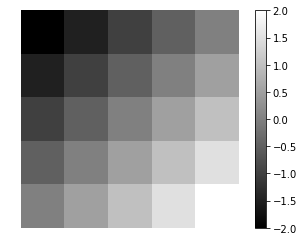

In [27]:
plt.imshow(z, cmap='gray')
plt.axis('off')
plt.colorbar()

Now the the whole range of color (back to white in grayscale) is mapped to values between -2 and 2!

By default, when you pass in an 2D image to Matplotlib to plot, it will map the entire range between the minimum and the maximum value of the image to the color map!

## Adjusting the mapping range

Although this **auto-scaling** of image value range can be useful, sometimes, you would want to control exactly what range of values gets mapped to the colormap, giving you some consistency across different images. For example, if I prepare scaled versions of the images:

(-0.5, 4.5, 4.5, -0.5)

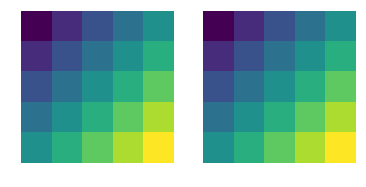

In [28]:
x = np.linspace(-1, 1, 5)
y = np.linspace(-1, 1, 5)[:, np.newaxis]

image1 = x + y

image2 = image1 * 0.5 # scaled to half of image1

plt.subplot(1, 2, 1)
plt.imshow(image1)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(image2)
plt.axis('off')

Because of autoscaling, you cannot tell that these two images actually have differnet values. Plotting the colorbars can help a bit:

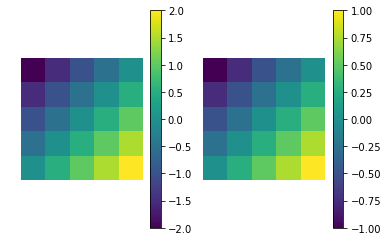

In [29]:
x = np.linspace(-1, 1, 5)
y = np.linspace(-1, 1, 5)[:, np.newaxis]

image1 = x + y

image2 = image1 * 0.5 # scaled to half of image1

plt.subplot(1, 2, 1)
plt.imshow(image1)
plt.axis('off')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.imshow(image2)
plt.axis('off')
plt.colorbar()

...but the difference is not intuitive! You can actually control the range of color mapping with `vmin` and `vmax` keyword arguments to `imshow`!

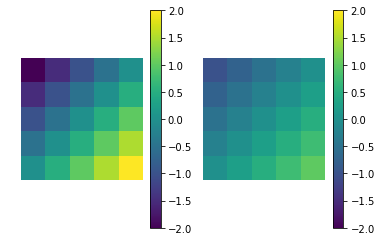

In [30]:
x = np.linspace(-1, 1, 5)
y = np.linspace(-1, 1, 5)[:, np.newaxis]

image1 = x + y

image2 = image1 * 0.5 # scaled to half of image1

plt.subplot(1, 2, 1)
plt.imshow(image1, vmin=-2, vmax=2)
plt.axis('off')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.imshow(image2, vmin=-2, vmax=2)
plt.axis('off')
plt.colorbar()

Now the two images **are plotted with the same colorbar**, and the difference between the two images (datawise) is much more visually apparent!

Now that we have discussed quite a bit about 2D array as a gray scale image, let's move onto talking about **colored images**!

# Working with colored images

We already saw how a 2D array can be interpreted as a "grayscale" image with the exact pixel values mapping into different color controlled by colormap. But what if I want to represent a **colored image**? This is where a 3D array as image comes into! To get a sense of this, let's go ahead and take a look at a real colored image:

## Loading external images

Although you could create an arbitrary NumPy arrays from scratch and treat them as images as we have been, you are far more likely to want to get images loaded from external sources - i.e. an image file!

The ability to load in common image file formats is provided by a package called `imageio` (along with many other packages)!

In [31]:
import imageio

In [32]:
image = imageio.imread('data/image_japan.jpg')

Let's take a quick look at the image:

(-0.5, 4031.5, 3023.5, -0.5)

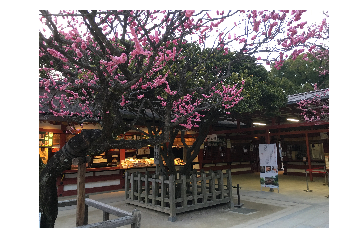

In [33]:
plt.imshow(image)
plt.axis('off')

Let's now take a closer look at this **colored** image.

## 3D arrays as images with color channels

If you take a look at the shape of the loaded color image:

In [34]:
image.shape

(3024, 4032, 3)

you should notice two things:

* the array is now 3D - there is an extra trailing dimension
* and the shape of the array in the third dimension is 3

This has to do a lot with how colors are presented in computers: as combination of red, green and blue values.

Colored images are thought of being composed of 3 distinct **channels**, each specifying the red, greeen and blue values for each pixel. You can actually see this by taking a colored image, and turning all but one channel 0:

(-0.5, 4031.5, 3023.5, -0.5)

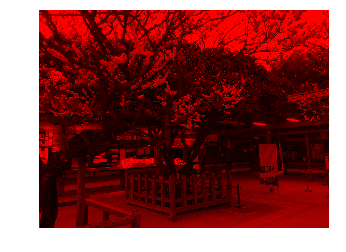

In [35]:
red_image = imageio.imread('data/image_japan.jpg')

# turn Green and Blue channels 0
red_image[:, :, 1] = 0
red_image[:, :, 2] = 0

plt.imshow(red_image)
plt.axis('off')

(-0.5, 4031.5, 3023.5, -0.5)

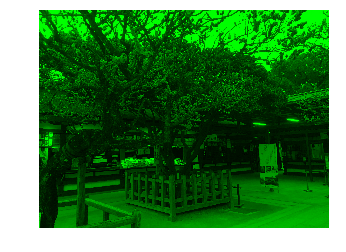

In [36]:
green_image = imageio.imread('data/image_japan.jpg')

# turn Red and Blue channels 0
green_image[:, :, 0] = 0
green_image[:, :, 2] = 0

plt.imshow(green_image)
plt.axis('off')

(-0.5, 4031.5, 3023.5, -0.5)

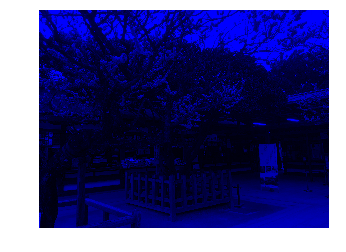

In [37]:
blue_image = imageio.imread('data/image_japan.jpg')

# turn Red and Green channels 0
blue_image[:, :, 0] = 0
blue_image[:, :, 1] = 0

plt.imshow(blue_image)
plt.axis('off')

A full colored image results from combining these individual channels:

(-0.5, 4031.5, 3023.5, -0.5)

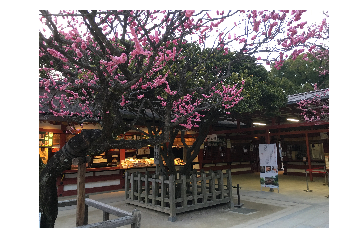

In [38]:
plt.imshow(red_image + green_image + blue_image)
plt.axis('off')

## Creating your own colored image

Now you know the secret behind a colored image, you can imagine creating some fancy colored image by simply stacking up three separate images, corresponding to red, green and blue channel!

Text(0.5,1,'Blue channel')

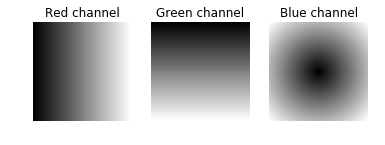

In [39]:
N = 100 # number of samples
x = np.linspace(0, 1, N)
y = np.linspace(0, 1, N)[:, np.newaxis]

red = x + 0 * y
green = 0 * x + y
blue = np.sqrt((x - 0.5)**2 + (y-0.5)**2)

plt.subplot(1, 3, 1)
plt.imshow(red, cmap='gray')
plt.axis('off')
plt.title('Red channel')

plt.subplot(1, 3, 2)
plt.imshow(green, cmap='gray')
plt.axis('off')
plt.title('Green channel')

plt.subplot(1, 3, 3)
plt.imshow(blue, cmap='gray')
plt.axis('off')
plt.title('Blue channel')

Text(0.5,1,'Combined channels')

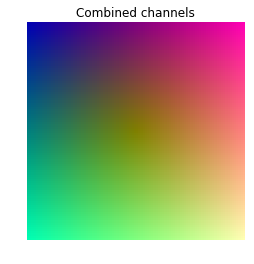

In [40]:
combined = np.stack([red, green, blue], -1)
plt.imshow(combined)
plt.axis('off')
plt.title('Combined channels')

### On tangent: more structured plotting

Did you notice that you were now repeating something very similar over and over? It's time to structure your plotting code to get it done more quickly!

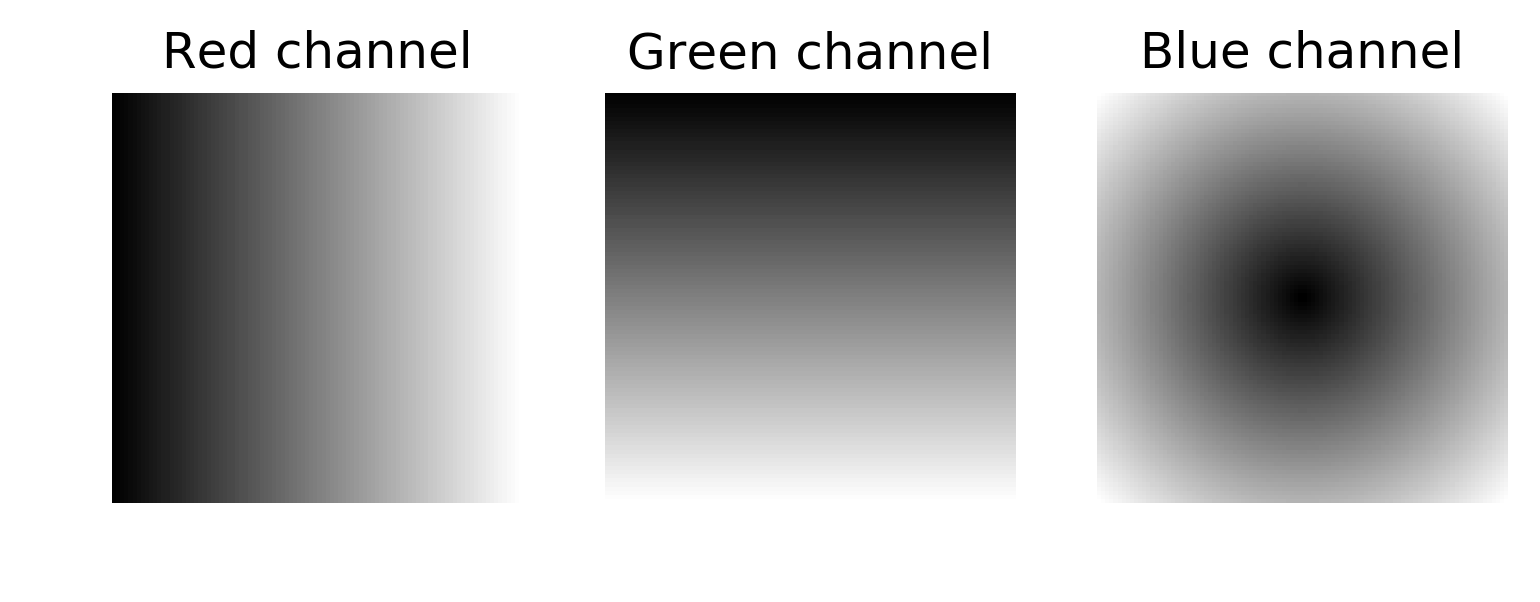

In [41]:
N = 100 # number of samples
x = np.linspace(0, 1, N)
y = np.linspace(0, 1, N)[:, np.newaxis]

red = x + 0 * y
green = 0 * x + y
blue = np.sqrt((x - 0.5)**2 + (y-0.5)**2)

channels = [red, green, blue]
labels = ['Red', 'Green', 'Blue']

fig, axs = plt.subplots(1, 3, dpi=300)

for ax, channel, label in zip(axs, channels, labels):
    ax.imshow(channel, cmap='gray')
    ax.axis('off')
    ax.set_title('{} channel'.format(label))

The new guy here is `zip` function: `zip` takes in one or more **iterables** and **zips together** same positioned elements from each and every iterable.

In [43]:
names = ['Maku', 'Chabo', 'Lulu']
colors = ['Black', 'Brown', 'Gray']
ages = [7, 6, 1]

for name, color, age in zip(names, colors, ages):
    print('{} is a {} dog and {} years old!'.format(name, color, age))

Maku is a Black dog and 7 years old!
Chabo is a Brown dog and 6 years old!
Lulu is a Gray dog and 1 years old!


From time to time, using `zip` with Matplotlib's object based plotting (e.g. getting an array of axes) can save a lot of typing!

## Image data types

We saw that when working with a grayscale image (that is, a 2D image), then you can control how the value of a pixel maps to a color using a *color map*, and you can even control the range using `vmin` and `vmax`. How does it work for a colored image?

It turns out that Matplotlib understands two types of colored images:

1. Integer images with values between 0 and 255 for each pixel and channel.
2. Float images with values between 0.0 and 1.0 for each pixel and channel.

We have already encountered both types. You tend to get an integer image when you load images from a file.

(-0.5, 4031.5, 3023.5, -0.5)

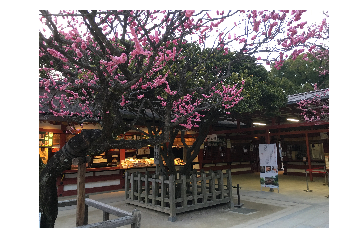

In [44]:
image = imageio.imread('data/image_japan.jpg')

plt.imshow(image)
plt.axis('off')

In [45]:
image.max(), image.min()

(255, 0)

In [46]:
image.dtype

dtype('uint8')

Here the data type (`dtype`) of `uint8` means 8-bit unsigned integer. In other words, it can hold integer values between 0-255.

When we constructed an image by stacking channels, we constructd a **float** value NumPy array that actually ranged between 0 and 1.

(-0.5, 99.5, 99.5, -0.5)

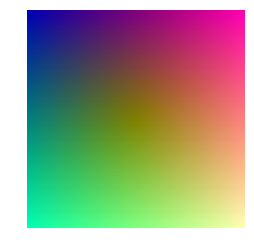

In [47]:
N = 100 # number of samples
x = np.linspace(0, 1, N)
y = np.linspace(0, 1, N)[:, np.newaxis]

red = x + 0 * y
green = 0 * x + y
blue = np.sqrt((x - 0.5)**2 + (y-0.5)**2)
combined = np.stack([red, green, blue], -1)

plt.imshow(combined)
plt.axis('off')

In [48]:
combined.min(), combined.max()

(0.0, 1.0)

In [49]:
combined.dtype

dtype('float64')

What happens if we would have scaled the floating image outside of range [0, 1]?

In [50]:
scaled_image = combined * 2 # double the value
scaled_image.min(), scaled_image.max()

(0.0, 2.0)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(-0.5, 99.5, 99.5, -0.5)

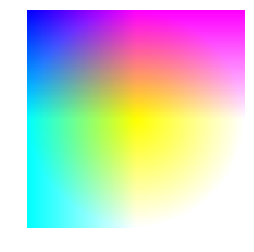

In [51]:
plt.imshow(scaled_image)
plt.axis('off')

You actually get a warning that the input value gets **clipped** between 0 and 1 for floating image or 0 and 255 for integer image.

# Image manipulation and processing

Now we have learned quite a bit on how to load an image as well as how an image is represented using NumPy array, it's time to perform some basic **manipulation/processing** on image.

Let's go ahead an work with an image that you can find from `scipy.misc`:

In [52]:
from scipy.misc import face
image = face(gray=True) # get gray scale image

(-0.5, 1023.5, 767.5, -0.5)

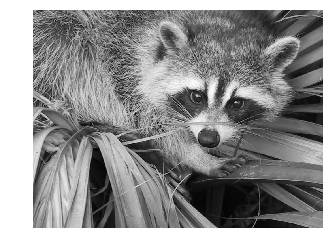

In [53]:
plt.imshow(image, cmap='gray')
plt.axis('off')

## Manipulating image by NumPy array manipulation

Since an image is nothing but a NumPy array, you can perform any valid manipulation on the array, resulting in a manipulation of the image represented by the array.

### Cropping an image

You can **crop** an image by simply performing slicing on the first two dimensions of the image, corresponding to the *height* and *width*.

In [54]:
image.shape

(768, 1024)

(-0.5, 623.5, 367.5, -0.5)

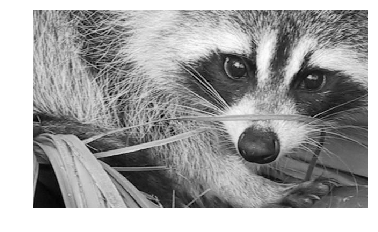

In [55]:
plt.imshow(image[200:-200, 200:-200], cmap='gray')
plt.axis('off')

### Flipping an image

You can use reversed slicing (`::-1`) to easily **flip** an image:

#### Flip horizontally (left-right flip)

(-0.5, 1023.5, 767.5, -0.5)

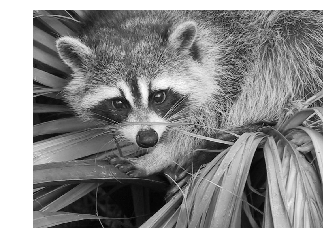

In [56]:
plt.imshow(image[:, ::-1], cmap='gray')
plt.axis('off')

#### Flip vertically (up-down flip)

(-0.5, 1023.5, 767.5, -0.5)

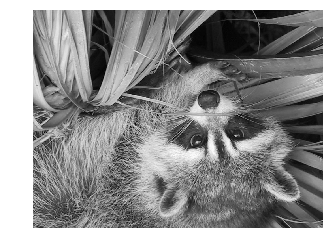

In [57]:
plt.imshow(image[::-1, :], cmap='gray')
plt.axis('off')

### Fill in values

Manipulation of array content, results in modification of the image:

In [58]:
image = face(gray=True) # get gray scale image

(-0.5, 1023.5, 767.5, -0.5)

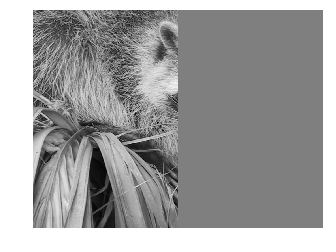

In [59]:
image_c = image.copy() # make a copy of image
h, w = image_c.shape # get height and width
image_c[:, w//2:] = 127 # replace the right half with 127
plt.imshow(image_c, cmap='gray', vmin=0, vmax=255)
plt.axis('off')

## Masking of an image

You can achieve more interesting results by combining two or more images/arrays together.

First let's create an image of same size and fill it with 0s.

(-0.5, 1023.5, 767.5, -0.5)

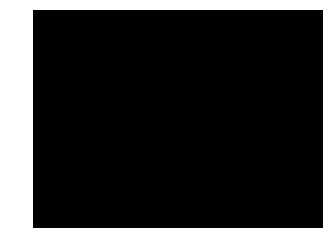

In [61]:
mask = np.zeros(image.shape)

plt.imshow(mask, cmap='gray')
plt.axis('off')

If we multiply this mask with an image, then obviously everything becomes black (0).

(-0.5, 1023.5, 767.5, -0.5)

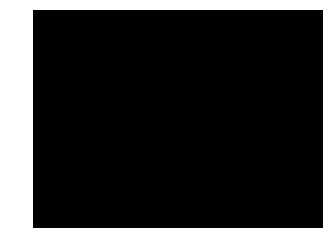

In [62]:
masked_image = image * mask
plt.imshow(masked_image, cmap='gray', vmin=0, vmax=255)
plt.axis('off')

Instead, let's change the mask, but filling some center rectangle with 1's.

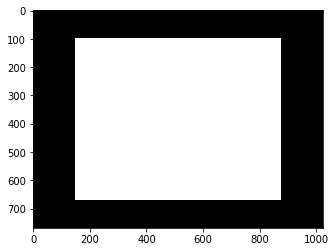

In [63]:
vpad = 100
hpad = 150

mask[vpad:-vpad, hpad:-hpad] = 1

plt.imshow(mask, cmap='gray')

Now we can use this as a **mask** on the image.

(-0.5, 1023.5, 767.5, -0.5)

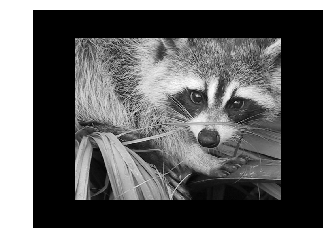

In [64]:
masked_image = image * mask
plt.imshow(masked_image, cmap='gray')
plt.axis('off')

### More complex masks with boolean operations

Using arrays of x and y values and NumPy boolean arrays, you can create fancier masks.

#### Circular mask

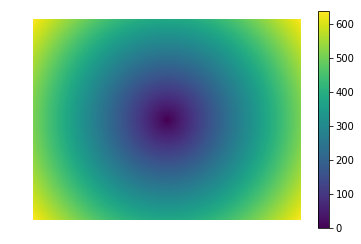

In [65]:
h, w = image.shape
yv, xv = np.ix_(np.arange(h), np.arange(w))
yc, xc = h // 2, w // 2

# compute distance from the center
r = np.sqrt((xv - xc)**2 + (yv - yc)**2)

plt.imshow(r)
plt.axis('off')
plt.colorbar()

Above, each pixel value is the distance from the center. We can now only select pixels with distance less than say 300:

In [66]:
mask = r < 300

(-0.5, 1023.5, 767.5, -0.5)

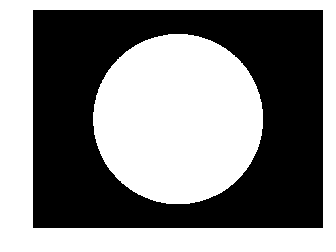

In [67]:
plt.imshow(mask, cmap='gray')
plt.axis('off')

Finally we can combine this with our image:

(-0.5, 1023.5, 767.5, -0.5)

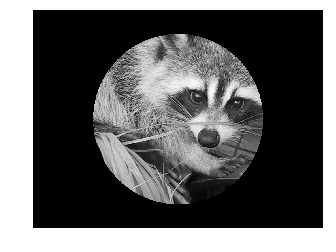

In [68]:
masked_image = mask * image

plt.imshow(masked_image, cmap='gray')
plt.axis('off')

## Thresholding an image

In fact use of boolean array can be a quite powerful technique in image manipulation. A very common technique is **thresholding** where you select only pixels that is either above or below a specific value, or threshold.

(-0.5, 1023.5, 767.5, -0.5)

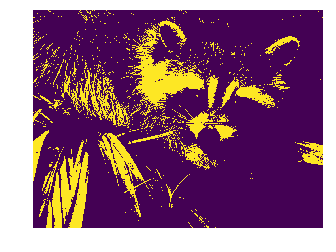

In [69]:
thresholded_image = image > 170

plt.imshow(thresholded_image)
plt.axis('off')

Note that `thesholded_image` is a boolean array. We can now use this as a mask onto the original image:

(-0.5, 1023.5, 767.5, -0.5)

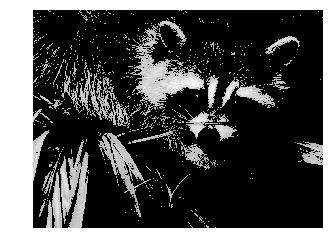

In [70]:
masked_image = image * thresholded_image

plt.imshow(masked_image, cmap='gray')
plt.axis('off')

You can of course use the boolean mask in *fancy indexing*, changing values of only `True`'s in the mask:

(-0.5, 1023.5, 767.5, -0.5)

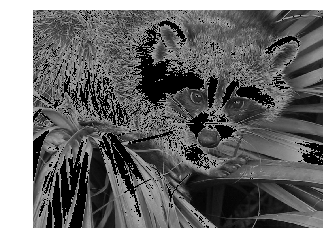

In [71]:
image_c = image.copy()

image_c[thresholded_image] = 0 # make bright parts black

plt.imshow(image_c, cmap='gray', vmin=0, vmax=255)
plt.axis('off')

## Filtering images

One of a very common yet extremely powerful image processing technique is **filtering** whereby you apply a filter to every pixel of an image. Depending on the filter you use, you can achieve various interesting image manipulations such as blurring or edge enhancement.

Although we can use functions like `np.convolve` to achieve the filtering ourselves, various interesting filtering operations can be found inside `scipy.ndimage` subpackage.

In [72]:
from scipy import  ndimage

### Gaussian blur

You can **blur** or **smoothen out** your image by letting each pixel be replaced by an average of nearby pixels. A very common filter for this job is **Gaussian filter**, which performs weighted average of pixel values weighting pixels based on Gaussian distance profile - more weights are given to nearby pixels.

You control the size of the Gaussian filter (how far out it looks out to average) by controling the standard deviation or **sigma** of the filter.

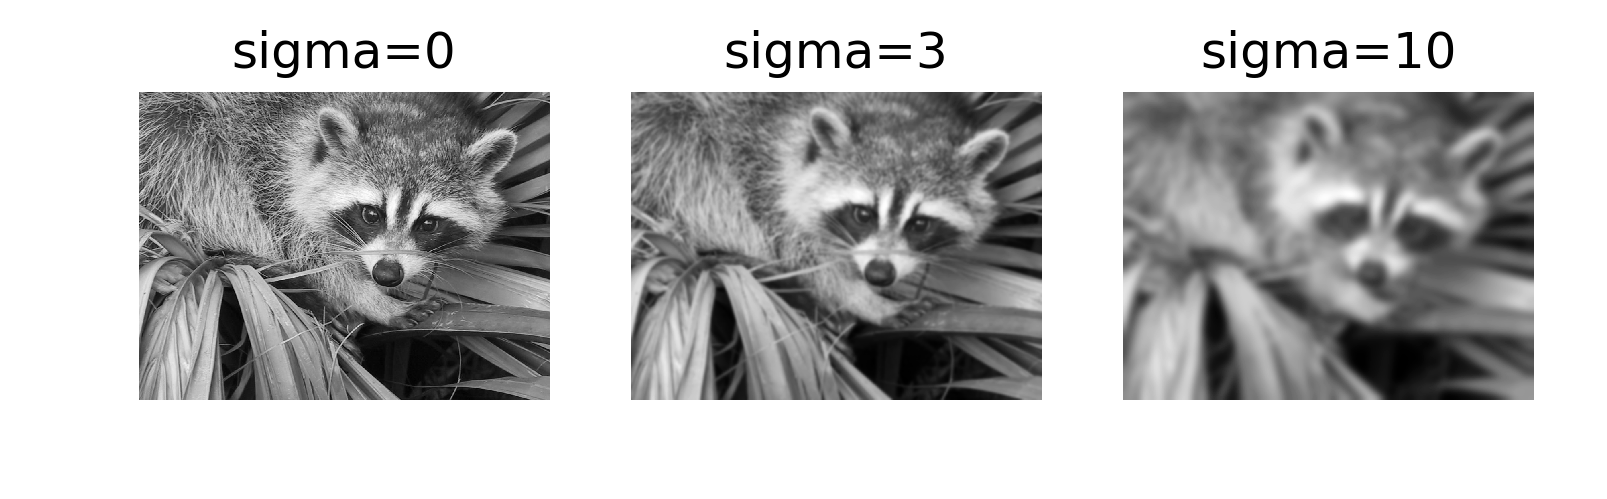

In [73]:
image = face(gray=True) # load image again

blurred_image = ndimage.gaussian_filter(image, sigma=3)
very_blurred = ndimage.gaussian_filter(image, sigma=10)

images = [image, blurred_image, very_blurred]
sigmas = [0, 3, 10]

fig, axs = plt.subplots(1, len(images), dpi=300)

for ax, image, sigma in zip(axs, images, sigmas):
    ax.imshow(image, cmap='gray')
    ax.axis('off')
    ax.set_title('sigma={}'.format(sigma))

## Sharpening an image

You can achieve a bit of an opposite of blurring - that is, image sharpening - true a clever use of a **sharpening filter**. Alternatively, it turns out that the same result can be subtracting off Gaussian blurred image.

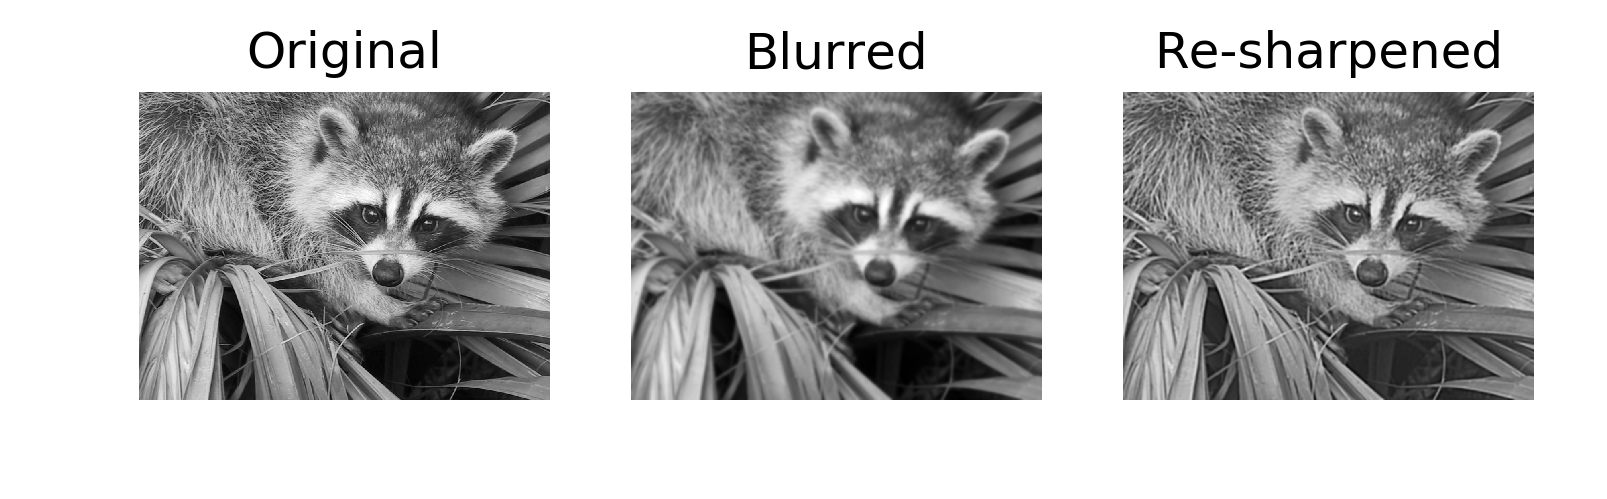

In [82]:
image = face(gray=True).astype(float)
blurred_image = ndimage.gaussian_filter(image, 3)
filter_blurred_image = ndimage.gaussian_filter(blurred_image, 1)
alpha = 30
sharpened_image = blurred_image + alpha * (blurred_image - filter_blurred_image)

images = [image, blurred_image, sharpened_image]
titles = ['Original', 'Blurred', 'Re-sharpened']

fig, axs = plt.subplots(1, len(images), dpi=300)

for ax, image, title in zip(axs, images, titles):
    ax.imshow(image, cmap='gray')
    ax.axis('off')
    ax.set_title(title)

# Foreground-Background separation

When processing an image, you often encounter a need to separate the background from the foreground. This may be an essential step in performing **object detection** whereby you identify areas in the image that corresponds to different objects (e.g. cells). Consider the following image of some bacterial blobs or colonies:

(-0.5, 255.5, 255.5, -0.5)

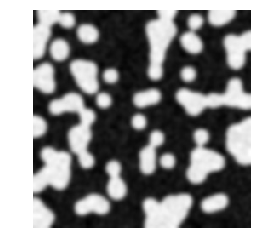

In [83]:
image = plt.imread('data/blobs.jpg')
plt.imshow(image)
plt.axis('off')

This image is loaded actually as RGB image. To make it easier to work with lets **flatten out** the color by simply average out the last dimension:

In [84]:
image = image.mean(axis=2)

(-0.5, 255.5, 255.5, -0.5)

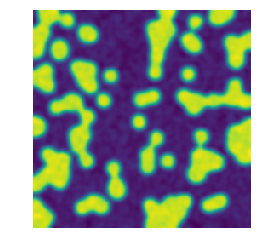

In [85]:
plt.imshow(image)
plt.axis('off')

We could try to detect the foreground by theresholding the image:

To come up with a suitable threshold, let's look at the distribution of the image intensity:

Text(0.5,0,'Image intensity')

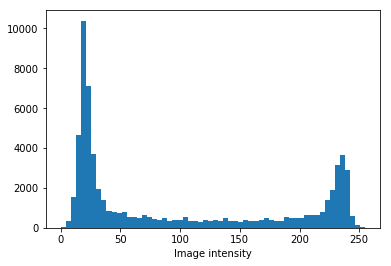

In [86]:
plt.hist(image.ravel(), bins=60)
plt.xlabel('Image intensity')

There appears to be nice separation between the two humps - likely, one is for the background and the other for the foreground. Let's take this to set the value of the threshold:

(-0.5, 255.5, 255.5, -0.5)

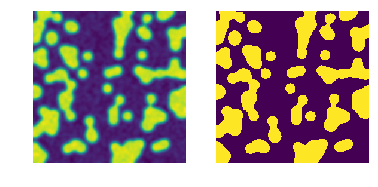

In [87]:
mask = image > 125

plt.subplot(1, 2, 1)
plt.imshow(image)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(mask)
plt.axis('off')

Finally you can use `ndimage`'s `label` function to label each contiguous areas: 

In [88]:
label_im, nb_labels = ndimage.label(mask)

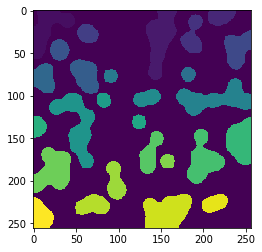

In [89]:
plt.imshow(label_im)

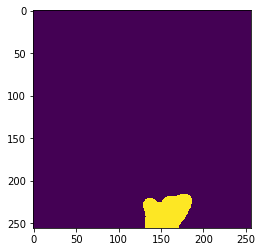

In [90]:
plt.imshow(label_im==25)

In [91]:
group = label_im == 25
group.sum()

1814